**Data loading and Preprocessing**


In [78]:
# load data
import pandas as pd

df = pd.read_csv("Downloads/pollution.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [240]:
df.describe()

,month,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,6.523549,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,3.448572,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,4.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,7.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,10.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,12.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [80]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [81]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [82]:
len(df)

43824

In [83]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0,2014-12-31


In [84]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   No      43824 non-null  int64         
 1   year    43824 non-null  int64         
 2   month   43824 non-null  int64         
 3   day     43824 non-null  int64         
 4   hour    43824 non-null  int64         
 5   pm2.5   41757 non-null  float64       
 6   DEWP    43824 non-null  int64         
 7   TEMP    43824 non-null  float64       
 8   PRES    43824 non-null  float64       
 9   cbwd    43824 non-null  object        
 10  Iws     43824 non-null  float64       
 11  Is      43824 non-null  int64         
 12  Ir      43824 non-null  int64         
 13  date    43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 4.7+ MB


pm2.5 column contains null value, So we can use pandas DateTimeIndex function with start date-time as 2010-01-01 00:00:00 and end date-time as 2014-12-31 23:00:00. As our dataset contains hourly data so we can use freq as 'H' which stands for Hour.



In [85]:
# creating Date-Time index column
df['Date-Time'] = pd.date_range(start='2010-01-01 00:00:00', end='2014-12-31 23:00:00', freq='H')
# setting index as Date-Time
df.set_index('Date-Time', drop = True, inplace = True)

In [86]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
Date-Time,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [ ]:
#drop some data column
df.drop('No', inplace=True, axis=1)
df.drop('year', inplace=True, axis=1)
df.drop('day', inplace=True, axis=1)
df.drop('hour', inplace=True, axis=1)

In [88]:
df.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
Date-Time,,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
2010-01-01 01:00:00,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2010-01-01 02:00:00,1,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
2010-01-01 03:00:00,1,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
2010-01-01 04:00:00,1,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


**Data Exploratory**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Correlation between pm2.5 and features

In [90]:
# creation of correlation matrix
corrM = df.corr()

In [91]:
corrM

,month,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
month,1.000000,-0.024069,0.233975,0.170093,-0.062185,0.003043,-0.061672,0.036737
pm2.5,-0.024069,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.233975,0.171423,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,0.170093,-0.090534,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-0.062185,-0.047282,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,0.003043,-0.247784,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,-0.061672,0.019266,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548
Ir,0.036737,-0.051369,0.125090,0.049121,-0.079843,-0.010122,-0.009548,1.000000


<AxesSubplot:ylabel='Density'>

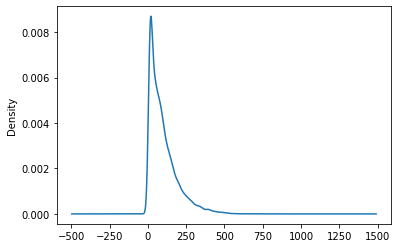

In [92]:
df["pm2.5"].plot.kde()  # Plot a single column

<AxesSubplot:ylabel='Density'>

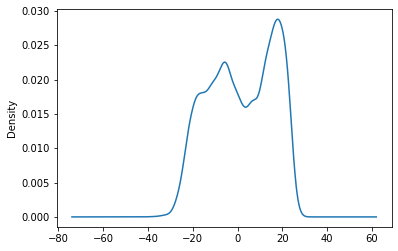

In [93]:
df["DEWP"].plot.kde()  # Plot a single column

<AxesSubplot:ylabel='Density'>

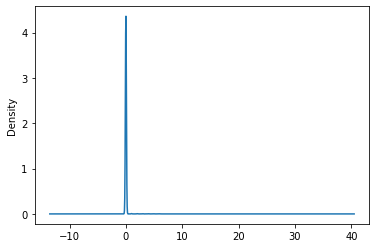

In [94]:
df["Is"].plot.kde()  # Plot a single column

**Data Preprocessing**

Imputing missing data and drop dublicates data

In [95]:
# let us check column-wise null values: before
df.isnull().sum()

month       0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
date        0
dtype: int64

In [96]:
# let us apply interpolation
cleaned_df = df.interpolate()

In [97]:
# let us check column-wise null values: before
cleaned_df.isnull().sum()

month     0
pm2.5    24
DEWP      0
TEMP      0
PRES      0
cbwd      0
Iws       0
Is        0
Ir        0
date      0
dtype: int64

In [98]:
missing_col = ['pm2.5']

for i in missing_col:
    cleaned_df.loc[cleaned_df.loc[:,i].isnull(),i]=cleaned_df.loc[:,i].median()

print("count of NULL values after imputation\n")
cleaned_df.isnull().sum()

count of NULL values after imputation



month    0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
date     0
dtype: int64

In [99]:
cleaned_df.drop_duplicates(inplace=True)

In [100]:
len(cleaned_df)

43822

In [101]:
len(df)

43824

**Feature Engineering**

1-)Feature Extraction

In [241]:
cleaned_df.tail()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,day_week,seasonal_rate
Date-Time,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1.0,231.97,0,0,1,3
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1.0,237.78,0,0,1,3
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1.0,242.70,0,0,1,3
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,1.0,246.72,0,0,1,3
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,1.0,249.85,0,0,1,3


In [103]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cleaned_df["cbwd"] = ord_enc.fit_transform(cleaned_df[["cbwd"]])

In [104]:
cleaned_df.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
Date-Time,,,,,,,,,,
2010-01-01 00:00:00,1,73.0,-21,-11.0,1021.0,1.0,1.79,0,0,2010-01-01
2010-01-01 01:00:00,1,73.0,-21,-12.0,1020.0,1.0,4.92,0,0,2010-01-01
2010-01-01 02:00:00,1,73.0,-21,-11.0,1019.0,1.0,6.71,0,0,2010-01-01
2010-01-01 03:00:00,1,73.0,-21,-14.0,1019.0,1.0,9.84,0,0,2010-01-01
2010-01-01 04:00:00,1,73.0,-20,-12.0,1018.0,1.0,12.97,0,0,2010-01-01


In [105]:
X = cleaned_df.iloc[:, 2:]
y = cleaned_df.iloc[:, 1]

In [242]:
X

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,day_week,seasonal_rate
Date-Time,,,,,,,,,
2010-01-01 00:00:00,-21,-11.0,1021.0,1.0,1.79,0,0,1,4
2010-01-01 01:00:00,-21,-12.0,1020.0,1.0,4.92,0,0,1,4
2010-01-01 02:00:00,-21,-11.0,1019.0,1.0,6.71,0,0,1,4
2010-01-01 03:00:00,-21,-14.0,1019.0,1.0,9.84,0,0,1,4
2010-01-01 04:00:00,-20,-12.0,1018.0,1.0,12.97,0,0,1,4
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,1.0,231.97,0,0,1,3
2014-12-31 20:00:00,-22,-3.0,1034.0,1.0,237.78,0,0,1,3
2014-12-31 21:00:00,-22,-3.0,1034.0,1.0,242.70,0,0,1,3


In [243]:
y

Date-Time
2010-01-01 00:00:00    73.0
2010-01-01 01:00:00    73.0
2010-01-01 02:00:00    73.0
2010-01-01 03:00:00    73.0
2010-01-01 04:00:00    73.0
                       ... 
2014-12-31 19:00:00     8.0
2014-12-31 20:00:00    10.0
2014-12-31 21:00:00    10.0
2014-12-31 22:00:00     8.0
2014-12-31 23:00:00    12.0
Name: pm2.5, Length: 43822, dtype: float64

Finding most important features

In [244]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selector = ExtraTreesRegressor()
feature_selector.fit(X,y)

ExtraTreesRegressor()

In [245]:
feature_selector.feature_importances_

array([0.26657015, 0.18021834, 0.18278169, 0.06928989, 0.16790026,
       0.00636286, 0.01073578, 0.03524592, 0.08089509])

<AxesSubplot:>

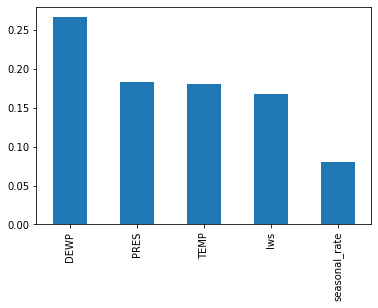

In [246]:
# 5 most important features
pd.Series(feature_selector.feature_importances_, index=X.columns).nlargest(5).plot(kind='bar')


Adding two new features to dataset

In [111]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [112]:
#Adding the day_week feature to dataset
cleaned_df['day_week'] = cleaned_df['date'].apply(lambda x: findDay(x))
cleaned_df.head()

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,day_week
Date-Time,,,,,,,,,,,
2010-01-01 00:00:00,1,73.0,-21,-11.0,1021.0,1.0,1.79,0,0,2010-01-01,Friday
2010-01-01 01:00:00,1,73.0,-21,-12.0,1020.0,1.0,4.92,0,0,2010-01-01,Friday
2010-01-01 02:00:00,1,73.0,-21,-11.0,1019.0,1.0,6.71,0,0,2010-01-01,Friday
2010-01-01 03:00:00,1,73.0,-21,-14.0,1019.0,1.0,9.84,0,0,2010-01-01,Friday
2010-01-01 04:00:00,1,73.0,-20,-12.0,1018.0,1.0,12.97,0,0,2010-01-01,Friday


In [113]:
#Adding the seasonal_rate feature to dataset based on coefficient of seasonal pollution 
cleaned_df.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], [4,4,4,2,2,2,1,1,1,3,3,3], inplace=True)

In [114]:
cleaned_df['seasonal_rate'] = cleaned_df.month

In [115]:
cleaned_df.drop('month', inplace=True, axis=1)

In [75]:
cleaned_df.tail()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,day_week,seasonal_rate
Date-Time,,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1.0,231.97,0,0,2014-12-31,1,3
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1.0,237.78,0,0,2014-12-31,1,3
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1.0,242.70,0,0,2014-12-31,1,3
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,1.0,246.72,0,0,2014-12-31,1,3
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,1.0,249.85,0,0,2014-12-31,1,3


In [116]:
#Convert day value to numeric value
cleaned_df.day_week.replace(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], [1,1,1,1,1,0,0], inplace=True)

In [117]:
cleaned_df.drop('date', inplace=True, axis=1)

In [124]:
cleaned_df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,day_week,seasonal_rate
Date-Time,,,,,,,,,,
2010-01-01 00:00:00,73.0,-21,-11.0,1021.0,1.0,1.79,0,0,1,4
2010-01-01 01:00:00,73.0,-21,-12.0,1020.0,1.0,4.92,0,0,1,4
2010-01-01 02:00:00,73.0,-21,-11.0,1019.0,1.0,6.71,0,0,1,4
2010-01-01 03:00:00,73.0,-21,-14.0,1019.0,1.0,9.84,0,0,1,4
2010-01-01 04:00:00,73.0,-20,-12.0,1018.0,1.0,12.97,0,0,1,4


**XGBOOST PREDICTION MODEL**

In [300]:
X = cleaned_df.iloc[:, 1:]
y = cleaned_df.iloc[:, 0]

In [301]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [314]:
from xgboost import XGBRegressor
# Model

xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                         learning_rate=0.05, max_depth=25, 
                         min_child_weight=1.7817, n_estimators=100,
                         reg_alpha=0.4640, reg_lambda=0.8571,
                         subsample=0.5213, silent=1,
                         random_state =7, nthread = -1)

xgb.fit(X_train, y_train)



[16:17:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=25,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [315]:
pred = xgb.predict(X_test)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pm2.5', ylabel='Density'>

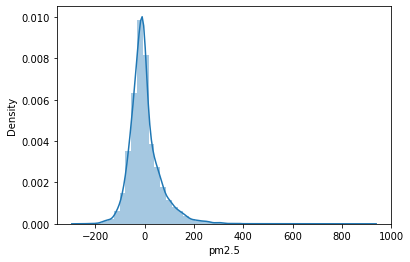

In [316]:
import seaborn as sns
sns.distplot(y_test - pred)

In [317]:
from sklearn import metrics
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Root Mean Error: 65.8382656621441


In [306]:
import pickle
pickle.dump(search, open('xgb.pkl', 'wb'))

In [309]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1000)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pm2.5', ylabel='Density'>

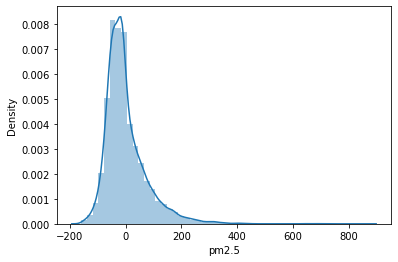

In [310]:
pred = forest.predict(X_test)
sns.distplot(y_test-pred)

In [311]:
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Root Mean Error: 74.45430231198172


In [ ]:
import pickle
pickle.dump(search, open('random-forest.pkl', 'wb'))

**Multivariate LSTM Forecast Model**


In [119]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [120]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [123]:
# load dataset
values = cleaned_df.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.073441   0.279412   0.131148   0.545454   0.333333   0.002290   
2   0.073441   0.279412   0.114754   0.527273   0.333333   0.007639   
3   0.073441   0.279412   0.131148   0.509090   0.333333   0.010698   
4   0.073441   0.279412   0.081967   0.509090   0.333333   0.016047   
5   0.073441   0.294118   0.114754   0.490910   0.333333   0.021396   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)   var1(t)  
1        0.0        0.0        1.0         1.0  0.073441  
2        0.0        0.0        1.0         1.0  0.073441  
3        0.0        0.0        1.0         1.0  0.073441  
4        0.0        0.0        1.0         1.0  0.073441  
5        0.0        0.0        1.0         1.0  0.073441  


In [125]:
len(reframed)

43821

In [152]:
#import libraries
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 

In [171]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24 
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 10) (8760,) (35061, 1, 10) (35061,)


In [172]:
test_X.shape

(35061, 1, 10)

Epoch 1/100
122/122 - 3s - loss: 0.0491 - accuracy: 0.0000e+00 - val_loss: 0.0502 - val_accuracy: 5.7043e-05
Epoch 2/100
122/122 - 0s - loss: 0.0314 - accuracy: 0.0000e+00 - val_loss: 0.0409 - val_accuracy: 5.7043e-05
Epoch 3/100
122/122 - 0s - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0340 - val_accuracy: 5.7043e-05
Epoch 4/100
122/122 - 0s - loss: 0.0166 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 5.7043e-05
Epoch 5/100
122/122 - 0s - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 5.7043e-05
Epoch 6/100
122/122 - 0s - loss: 0.0146 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 5.7043e-05
Epoch 7/100
122/122 - 1s - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 5.7043e-05
Epoch 8/100
122/122 - 0s - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 0.0128 - val_accuracy: 5.7043e-05
Epoch 9/100
122/122 - 0s - loss: 0.0150 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 5.7043e-05
Epoch 10/100
122/12

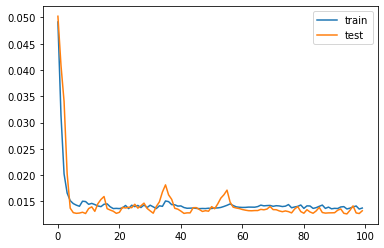

In [173]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=["accuracy"])
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [174]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 23.484


In [ ]:
#save model
model.save('lstm_model.h5')

**Comments**

*Root Mean Square Error of Random Forest Regressor:* 74.45430231198172
| *Root Mean Square Error of XGBOOST Regressor:* 65.8382656621441
| *Root Mean Square Error of LSTM Sequential Model:* 23.484

Best model is LSTM model. Because I convert the dataset to time series version based on multivarible and use a Sequential model on it. XGBOOST and Random Forest Regressor models errors must be less than above values. One of the reasons is XGBOOST is a Gradient boosting algorithm. So, Gradient boosting can be used to minimize any sensible loss function, and it is very effective in doing it. In addition, for XGBOOST and Random Forest Regressor models with hyperparemeter tuning, parameter values can be improved and better results can be obtained.

Also lstm model can be improved based on optimizer, more epochs and decreasing loss value of each iteration. I think RMSE value can be decreased around  10.0 - 20.0 values with the help of optimizations and better models.